# Оглавление
1. [Описание данных](#step1)  
2. [Описание проекта](#step2)
3. [Анализ и предобработка данных](#step3)
3. [Часть 1. Приоритизация гипотез](#step4)
4. [Часть 2. Анализ A/B-теста](#step5)

# Описание данных <a id="step1"></a>

#### Данные для первой части:

##### Таблица hypothesis:
1. Hypothesis — краткое описание гипотезы;
2. Reach — охват пользователей по 10-балльной шкале;
4. Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
#### Данные для второй части:

##### Таблица orders:
1. transactionId — идентификатор заказа;
2. visitorId — идентификатор пользователя, совершившего заказ;
3. date — дата, когда был совершён заказ;
4. revenue — выручка заказа;
5. group — группа A/B-теста, в которую попал заказ.
    
##### Таблица visitors:
1. date — дата;
2. group — группа A/B-теста;
3. visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта <a id="step2"></a>
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Приоритизация гипотез
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


### Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задача
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Анализ и предобработка данных <a id="step3"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
print(hypothesis.info())
pd.options.display.max_colwidth = int(hypothesis['Hypothesis'].str.len().max())
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек за...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропущенных значений нет

In [8]:
orders.duplicated().sum()

0

In [9]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено

In [10]:
#Переведем время во временной формат
orders['date'] = pd.to_datetime(orders['date'])

visitors['date'] = pd.to_datetime(visitors['date'])

Предстоит работать с данными по двум группам (А и В). Все данные приведены к нужному формату, дубликатов и пропусков нет

# Часть 1. Приоритизация гипотез <a id="step4"></a>

In [11]:
#Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек за...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [12]:
#Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек за...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Выводы:
1. В ICE самой приоритетной гипотезой являлась "Запустить акцию, дающую скидку на товар в день рождения", а самой неприоритетной "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".
2. В RICE "Запустить акцию, дающую скидку на товар в день рождения" спустился на 8 место. На первом месте оказалась гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что параметр Reach у задачи с формой подписки равна 10, в то время как у других гипотез она ниже. По этой же причине запуск акции по дню рождения спустился с 1 по 8 место из-за наименьшего Reach среди всех остальных гипотез
3. "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" имеет самые низкие числа по всем параметрам

# Часть 2. Анализ A/B-теста <a id="step5"></a>

In [13]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В таблице есть группа А и В

In [14]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [15]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Тест начинается первого августа, а заканчивается 31 августа.

In [16]:
share1 = orders.pivot_table(index='group', values='visitorId', aggfunc='nunique')
share1['share'] = share1['visitorId'] / share1['visitorId'].sum(axis=0) * 100
share1

,visitorId,share
group,,
A,503,46.189164
B,586,53.810836


46 на 53. Разница большая.

In [17]:
list = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'}).query('group > 1')['visitorId']
list.shape[0]

58

58 пользователей, которые находятся в двух группах. Следует их удалить

In [18]:
orders = orders[np.logical_not(orders["visitorId"].isin(list))]

Удалил пользователей, которые участвуют в обоих группах

In [19]:
share2 = orders.pivot_table(index='group', values='visitorId', aggfunc='nunique')
share2['share'] = share2['visitorId'] / share2['visitorId'].sum(axis=0) * 100
share2

,visitorId,share
group,,
A,445,45.734841
B,528,54.265159


Удалив дублирующихся пользователей отношение стало 45.7% на 54.3%. К сожалению так группа не должна делиться (должно быть ровно 50% на 50%, особенно на таких малых данных). Я бы продолжил тест, чтобы подкопить данные в группе А до уровня группы В. А пока пойдем подводить результаты анализа по текущим данным.

Text(0.5, 1.0, 'график кумулятивной выручки по группам')

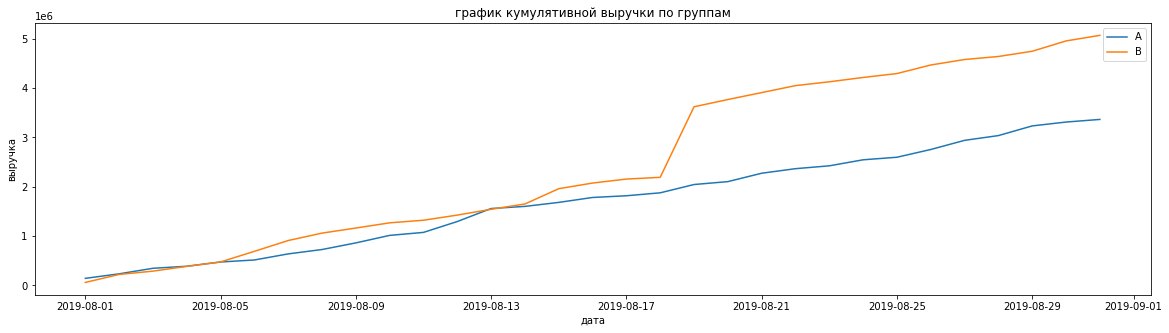

In [20]:
#Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = (
    datesGroups.
    apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
           agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).
    sort_values(by=['date','group'])
)

visitorsAggregated = (
    datesGroups.
    apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
         agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).
    sort_values(by=['date', 'group'])
)

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('график кумулятивной выручки по группам')

Выводы: Выручка стабильно растет. Однако на 19 день выручка в группа В резко возрастает. Наверное произошла дорогая покупка или в этот день было много заказов.

Text(0.5, 1.0, 'график кумулятивного среднего чека по группам')

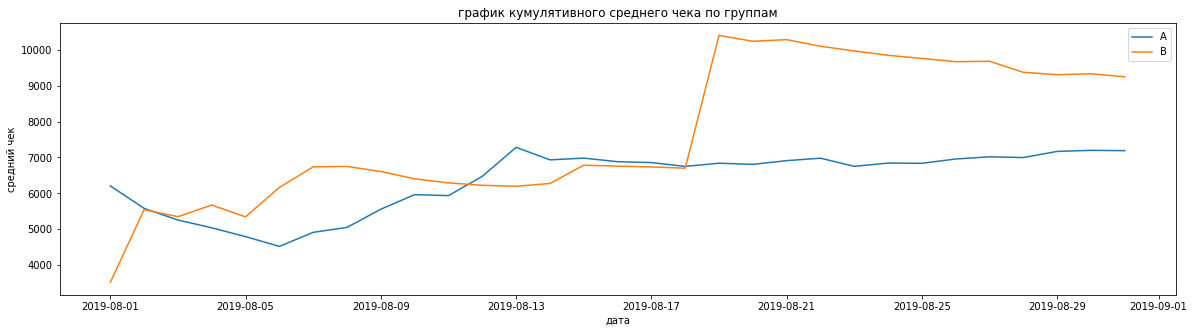

In [21]:
#Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
plt.figure(figsize=(20,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')

Выводы: Средний чек в группе В 19 августа резко увеличился, а потом постепенно начал снижаться. Это говорит о том, что 19 августва какая-то единичная дорогая покупка, которая повысила средний чек, однако потом средний чек в следующие дни начал постепенно снижаться и "приходить в норму". Группа А показала наименьший средний чек 6 августа. Однако потом произошел постепенный рост. После 13 числа средний чек группы А стабилизировался.

Text(0.5, 1.0, 'график относительного изменения кумулятивного среднего чека группы B к группе A')

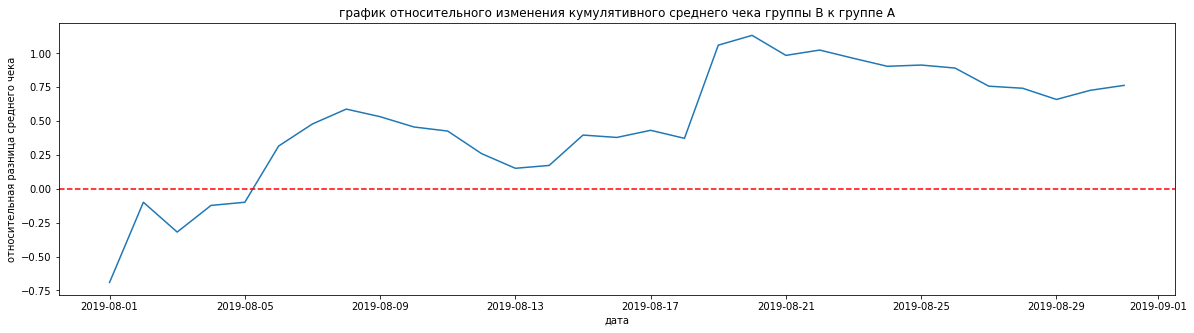

In [22]:
#Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

mergedCummulatieRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,5))
plt.plot(mergedCummulatieRevenue['date'], (mergedCummulatieRevenue['revenueB'] / mergedCummulatieRevenue['ordersA']) / (mergedCummulatieRevenue['revenueA'] / mergedCummulatieRevenue['ordersB']) - 1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('дата')
plt.ylabel('относительная разница среднего чека')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')

Выводы: Средний чек группы B выше относительно группы A во все дни. Очередное подтверждение, что на 19 день в группе B закрался потенциально крупный заказ.

Text(0.5, 1.0, 'график кумулятивной конверсии по группам')

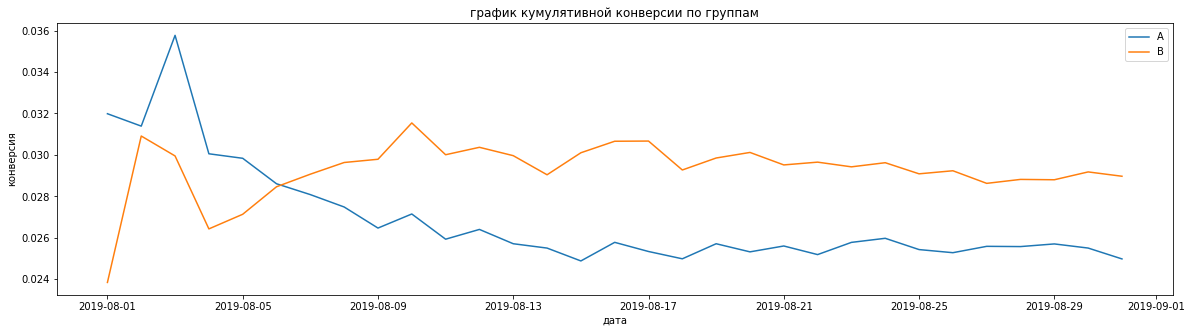

In [23]:
#Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

cumulativeConversionA = cumulativeData[cumulativeData['group']=='A'][['date','orders', 'visitors']]
cumulativeConversionB = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'visitors']]


plt.figure(figsize=(20,5))
plt.plot(cumulativeConversionA['date'], cumulativeConversionA['orders'] / cumulativeConversionA['visitors'], label='A')
plt.plot(cumulativeConversionB['date'], cumulativeConversionB['orders'] / cumulativeConversionB['visitors'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.title('график кумулятивной конверсии по группам')

Выводы: Практически симметричный график. Группа B просела 3 августа, а потом вырвалась выше по конверсии в сравнении с группой А

Text(0.5, 1.0, 'график относительного изменения кумулятивной конверсии группы B к группе A')

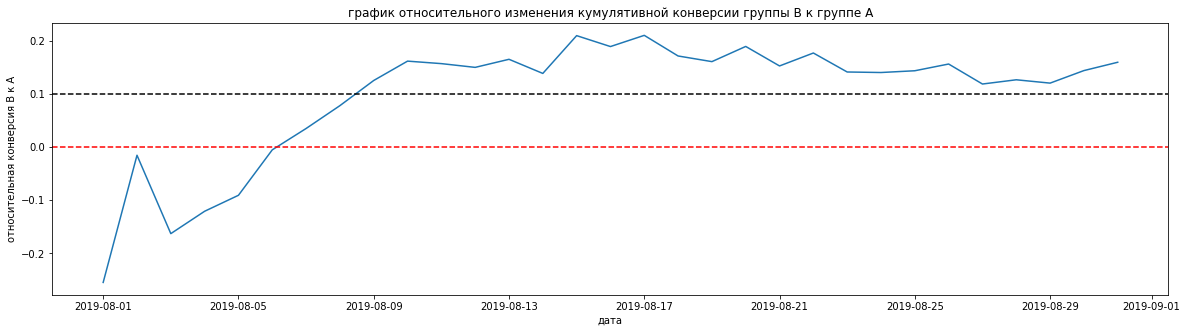

In [24]:
#Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

mergedConversion = cumulativeConversionA.merge(cumulativeConversionB, on='date', how='left', suffixes=['A','B'])

plt.figure(figsize=(20,5))
plt.plot(mergedConversion['date'], 
         (mergedConversion['ordersB'] / mergedConversion['visitorsB']) / (mergedConversion['ordersA'] / mergedConversion['visitorsA']) - 1)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.10, color='black', linestyle='--')
plt.xlabel('дата')
plt.ylabel('относительная конверсия В к А')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')

Выводы: Вначале группа В проигрывала в конверсии группе А. Однако потом группа В вырвалась вперед, чуть снизилась и показывает стабильную конверсию последние дни и не отпускается ниже 0.1. Однако делать какие-либо выводы по тесту рано. Стоит проанализировать аномалии, возможно, они изменят картину

Text(0.5, 1.0, 'точечный график количества заказов по пользователям')

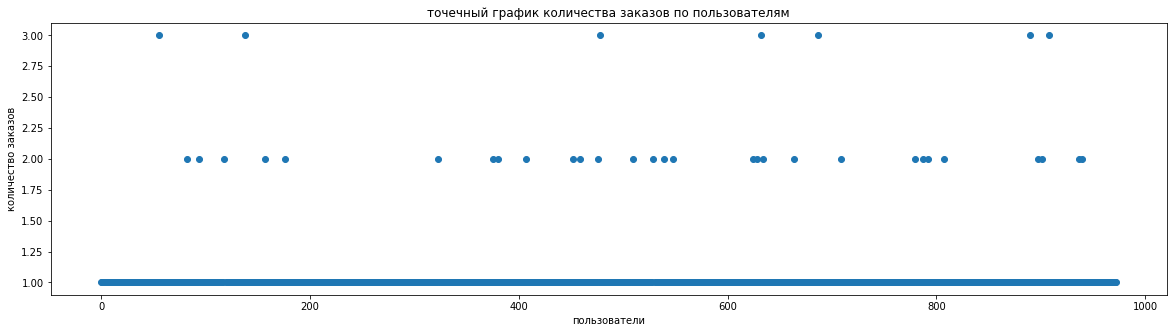

In [25]:
#Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

ordersByUsers = (orders.
                groupby('visitorId', as_index=False).
                agg({'transactionId':'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']


x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
plt.title('точечный график количества заказов по пользователям')

Выводы: Очень много пользователей с 2 - 4 заказами. Непонятно, какая у них доля, считать их аномалиями - ответ будет в следующей строке. 

In [26]:
#Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 
#Выберите границу для определения аномальных пользователей.

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Выводы: Выберем 2 заказа за нижнюю границу числа заказов. Всё что выше будем считать за аномалию и исключим

Text(0.5, 1.0, 'точечный график стоимостей заказов')

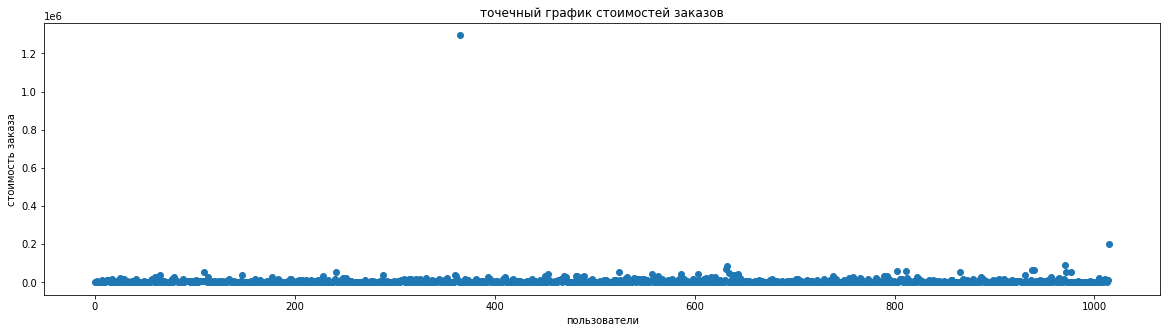

In [27]:
#Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

x1_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(20,5))
plt.scatter(x1_values, orders['revenue']) 
plt.xlabel('пользователи')
plt.ylabel('стоимость заказа')
plt.title('точечный график стоимостей заказов')

Выводы: Видим один заказ свыше 1 млн. Очень много заказ в районе 10 тыс. Скорее всего нижняя граница будет гораздо выше 10 тысяч рублей

In [28]:
#Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

#revenueByUsers = (orders.groupby('visitorId', as_index=False).agg({'revenue':'sum'}))
#revenueByUsers.columns = ['visitorId', 'revenue']

print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Выводы: Выберем заказы стоимостью в 26785 за нижнюю границу числа заказов (95 перцентиль). Всё что выше будем считать за аномалию и исключим

In [29]:
#Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 
#Сделайте выводы и предположения.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date':'max', 'visitorsPerDateB':'sum'}
    ),
    axis=1
)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].
    groupby('date', as_index=False).
    agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
)

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date':'max','ordersPerDateA':'sum', 'revenuePerDateA':'sum'}
    ),
    axis=1
)

ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].
    groupby('date', as_index=False).
    agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
)

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}
    ),
    axis=1
)

ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Объединили все данные, теперь приступаем к выявлению стат.значимостей в конверсии и среднем чеке. Напомню, что в первую очередь для интернет магазина важно увеличить выручку. Это значит, что в ключевую роль в стат.значимости сыграет не конверсия, а увеличения среднего чека. Без увеличения среднего чека, увеличение конверсии не имеет смысла.

#### Сформулируем нулевую и альтернативную гипотезы
Для конверсии:
1. Нулевая гипотеза: различий в конверсии между группами нет
2. Альтернативная гипотеза: различия в конверсии между группами есть

Для среднего чека:
1. Нулевая гипотеза: различий в среднем чеке между группами нет
2. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)

ordersByUsersB.columns = ['userId', 'orders']

sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                name='orders')],axis=0))


p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

alpha = .05

print("P-value в конверсии равняется:","{0:.3f}".format(p_value))
print()

if p_value < alpha:
    print('P-value меньше 0.05. \nЗначит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.')
else:
    print('P-value больше 0.05. \nЗначит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем.')

print()
print("Относительная разница конверсии группы В к группе А:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value в конверсии равняется: 0.011

P-value меньше 0.05. 
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Относительная разница конверсии группы В к группе А: 0.160


Выводы: Есть стат.значимый результат в конверсии. Также присутствует относительная разница в конверсии в пользу группы В: 16%. 

In [31]:
#Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
#Сделайте выводы и предположения.

p_value_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("P-value в среднем чеке равняется:","{0:.3f}".format(p_value_2))
print()

if p_value_2 < alpha:
    print('P-value меньше 0.05. \nЗначит, есть причина отвергать нулевую гипотезу и считать, что в среднем чеке есть различия')
else:
    print('P-value больше 0.05. \nЗначит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.')

print()
print("Относительная разница в среднем чеке группы В к группе А:", "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value в среднем чеке равняется: 0.829

P-value больше 0.05. 
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Относительная разница в среднем чеке группы В к группе А: 0.287


Выводы: Результат не стат.значимый. Однако присутствует большая относительная разница в среднем чеке в пользу группы В. Посмотрим, что покажут очищенные данные.

Теперь посчитаем подчищенные данные. Для этого исключим аномалии. Исходя из перцентилей исключим пользователей совершивших больше 4 заказов, а также исключим пользователей с покупкой больше 35000. 

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId'],
                                ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]
]['visitorId']

usersWithExpensiveOrders.columns = ['userId']

abnormalUsers = (
    pd.concat(
        [
            usersWithManyOrders, usersWithExpensiveOrders
        ],
        axis=0
    ).drop_duplicates().sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58


Всего 58 аномалий. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [33]:
#Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 
#Сделайте выводы и предположения.

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, 
                  index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                  name='orders'
                 )
    ],
    axis=0
)

p_value_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print("P-value в очищенных данных в конверсии равняется:","{0:.3f}".format(p_value_filtered))
print()

if p_value_filtered < alpha:
    print('P-value меньше 0.05. \nНулевую гипотезу о том, что статистически значимых различий в очищенных данных в конверсии между группами нет, отвергаем.')
else:
    print('P-value больше 0.05. \nНулевую гипотезу о том, что статистически значимых различий в очищенных данных в конверсии между группами нет, не отвергаем.')

print()
print("Относительная разница конверсии в очищенных данных группы В к группе А:", "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

P-value в очищенных данных в конверсии равняется: 0.012

P-value меньше 0.05. 
Нулевую гипотезу о том, что статистически значимых различий в очищенных данных в конверсии между группами нет, отвергаем.

Относительная разница конверсии в очищенных данных группы В к группе А: 0.182


Выводы: Результаты конверсии в очищенных данных практически не изменились. Однако увеличилась относительная разница конверсии группы В к группе А с 16% до 18.2%.

In [34]:
#Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
#Сделайте выводы и предположения.

revenueFilteredA = orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers))
    )
]['revenue']

revenueFilteredB = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers))
    )
]['revenue']

p_value_2_filtered = stats.mannwhitneyu(revenueFilteredA, revenueFilteredB)[1]

print("P-value в среднем чеке равняется:","{0:.3f}".format(p_value_2_filtered))
print()

if p_value_2_filtered < alpha:
    print('P-value меньше 0.05. \nЗначит, есть причина отвергать нулевую гипотезу и считать, что в среднем чеке есть различия')
else:
    print('P-value больше 0.05. \nЗначит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.')

print()
print("Относительная разница в среднем чеке группы В к группе А:", "{0:.3f}".format(revenueFilteredB.mean()/revenueFilteredA.mean()-1)) 

P-value в среднем чеке равняется: 0.646

P-value больше 0.05. 
Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Относительная разница в среднем чеке группы В к группе А: -0.048


Выводы: Результаты среднего чека в очищенных данных изменились, но результат всё ещё не стат.значимый. Однако сильно уменьшилась относительная разница среднего чека группы В к группе А с 28.7% до -4.8%. Теперь группа А выглядет чуточку получше. 

Примите решение по результатам теста и объясните его. 
#Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

### Какие выводы можно сделать по тестам?
1. Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к улучшению
4. График различия среднего чека между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к улучшению

Честно говоря, меня смутило что пользователей в группе А значительно меньше. Есть хорошие результаты в конверсии, значит как минимум можно продолжить тестирование. Пока мы не видим стат.значимых результатов по среднему чеку, но из текущих данных исходит вывод, что стоит и дальше проводить тестирование, по крайней мере, пока группы не уравняются. 